<a href="https://colab.research.google.com/github/khushbu-shah2928/khushbu-shah2928/blob/main/Prediction_of_fraudlent_transactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


 <b/><font color='purple'><center> Prediction of Fraudlent Transactions </center></font>

### <b><font color='purple'> Business Context:</b> </font>

This case requires trainees to develop a model for predicting fraudulent transactions for a
financial company and use insights from the model to develop an actionable plan. Data for the
case is available in CSV format having 6362620 rows and 10 columns.


Following usual model development procedures, the model would be estimated on the
calibration data and tested on the validation data. This case requires both statistical analysis and
creativity/judgment.

### <b><font color='purple'> Task required to be done: </font></b>
The task is to execute the process for proactive detection of fraud while answering following
questions.
1. Data cleaning including missing values, outliers and multi-collinearity.
2. Describe your fraud detection model in elaboration.
3. How did you select variables to be included in the model?
4. Demonstrate the performance of the model by using best set of tools.
5. What are the key factors that predict fraudulent customer?
6. Do these factors make sense? If yes, How? If not, How not?
7. What kind of prevention should be adopted while company update its infrastructure?
8. Assuming these actions have been implemented, how would you determine if they work?

## <b/> Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

import itertools
from collections import Counter

from statsmodels.stats.outliers_influence import variance_inflation_factor

## <b/> Loading the Dataset

In [ ]:
df = pd.read_csv("C:/Users/Khushbu Shah/Desktop/Accredian Internship/Fraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## <b/> Data Preprocessing

In [ ]:
df.shape

(6362620, 11)

In [ ]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
# Check for null values
df.isnull().values.any()

False

In [ ]:
# Load the dataset
df2 = pd.read_csv("C:/Users/Khushbu Shah/Desktop/Accredian Internship/Fraud.csv")
df2.head()



,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Check For Outliers

step


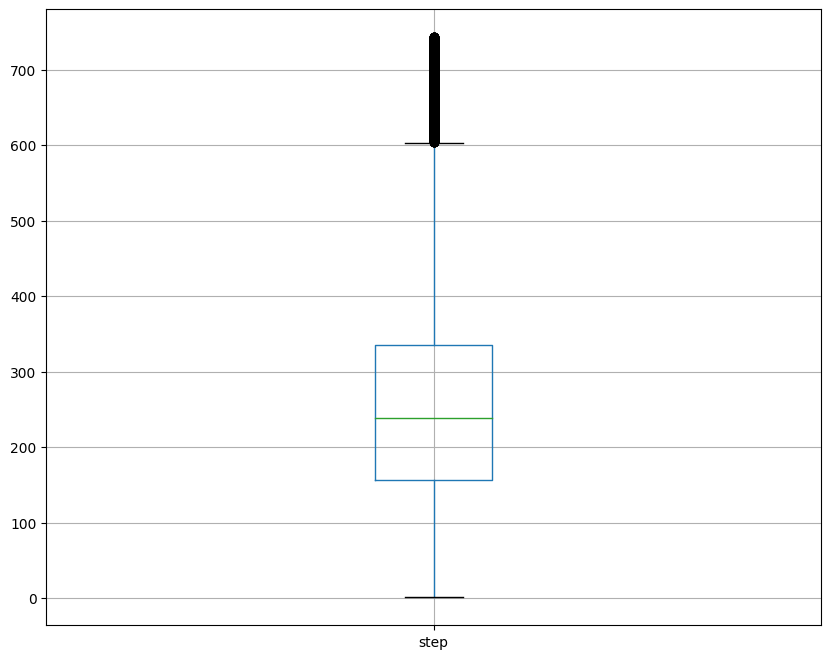

amount


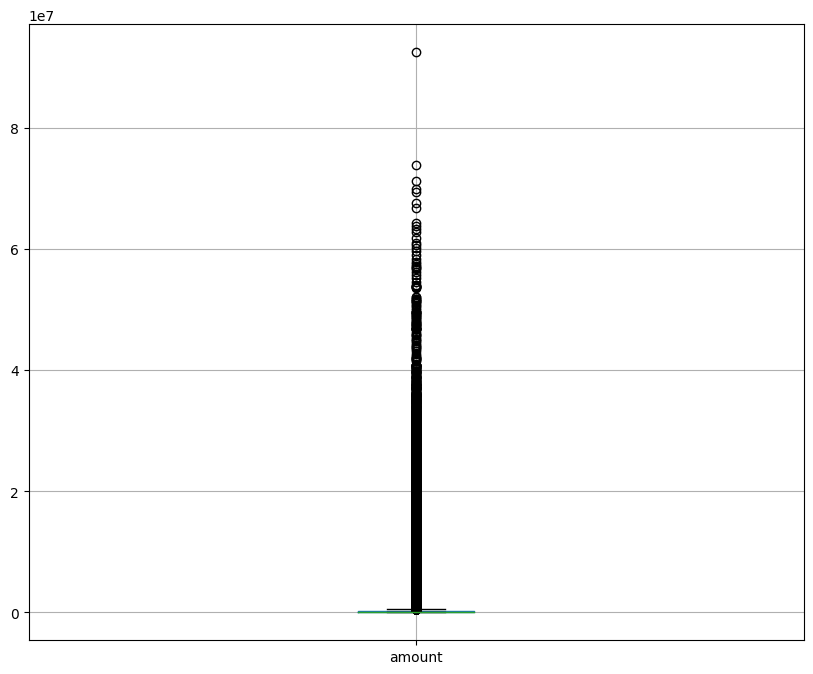

oldbalanceOrg


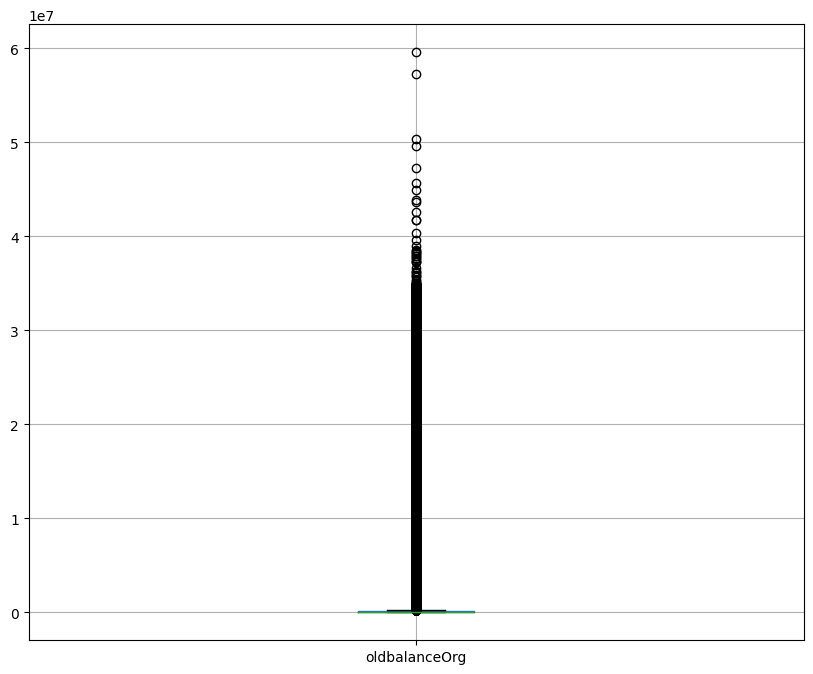

newbalanceOrig


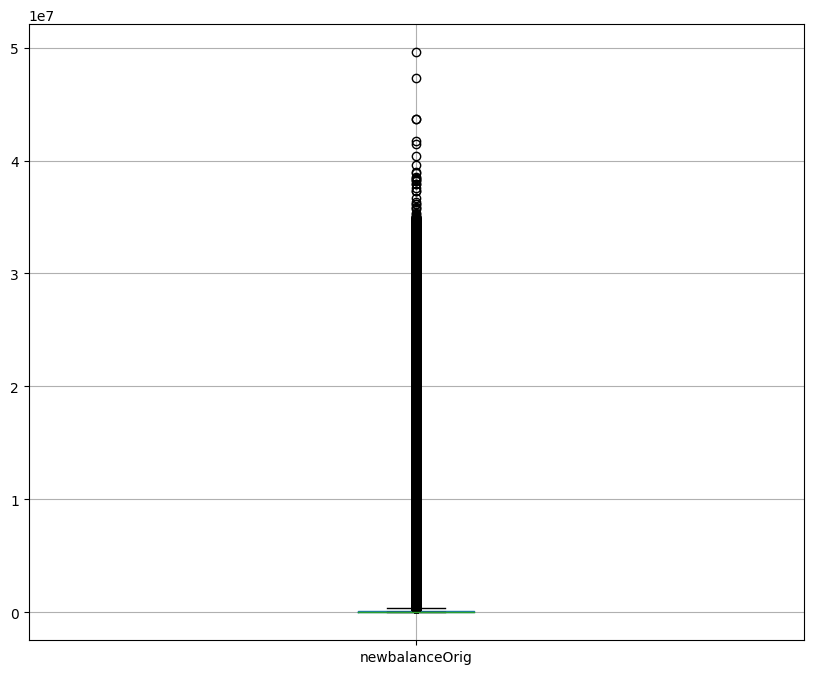

oldbalanceDest


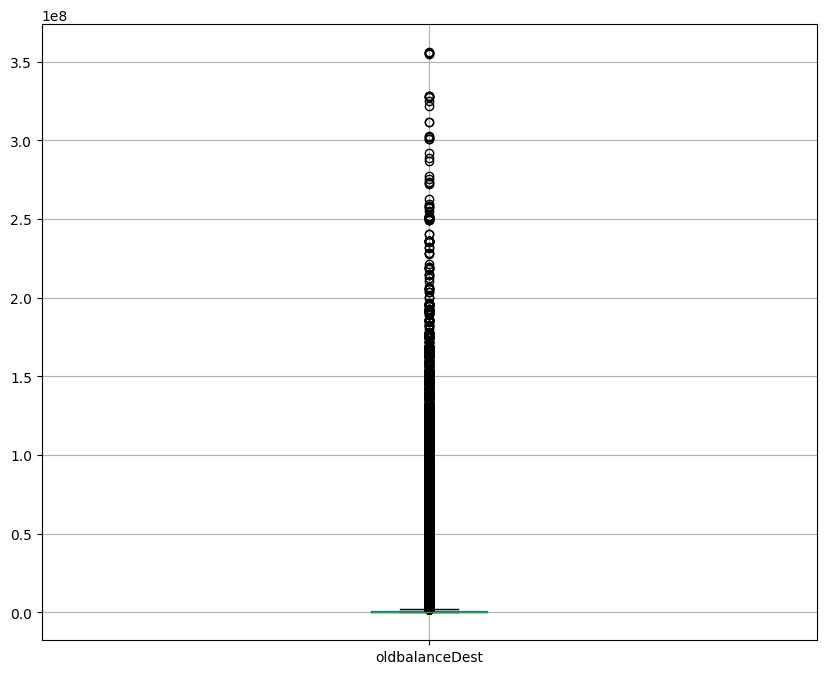

newbalanceDest


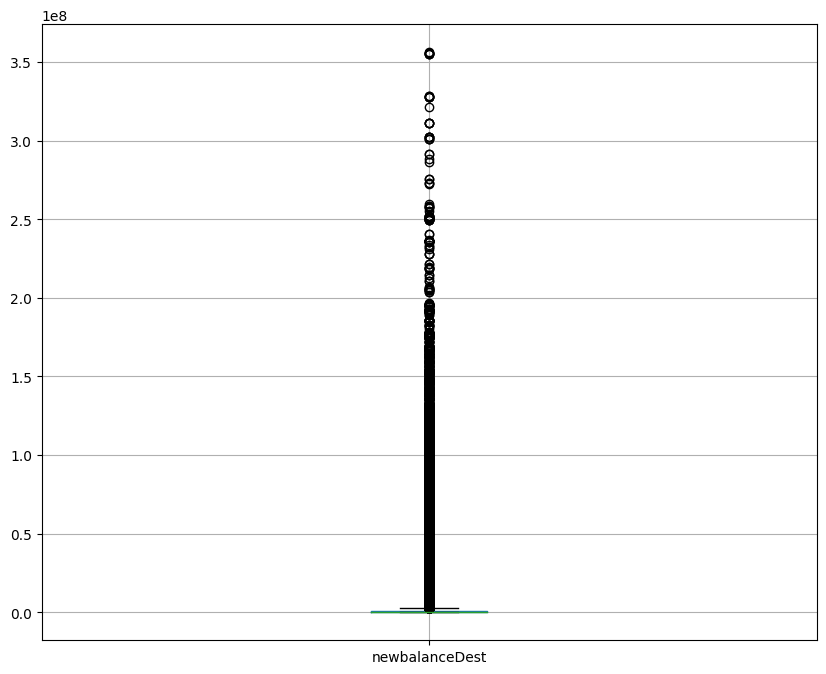

isFraud


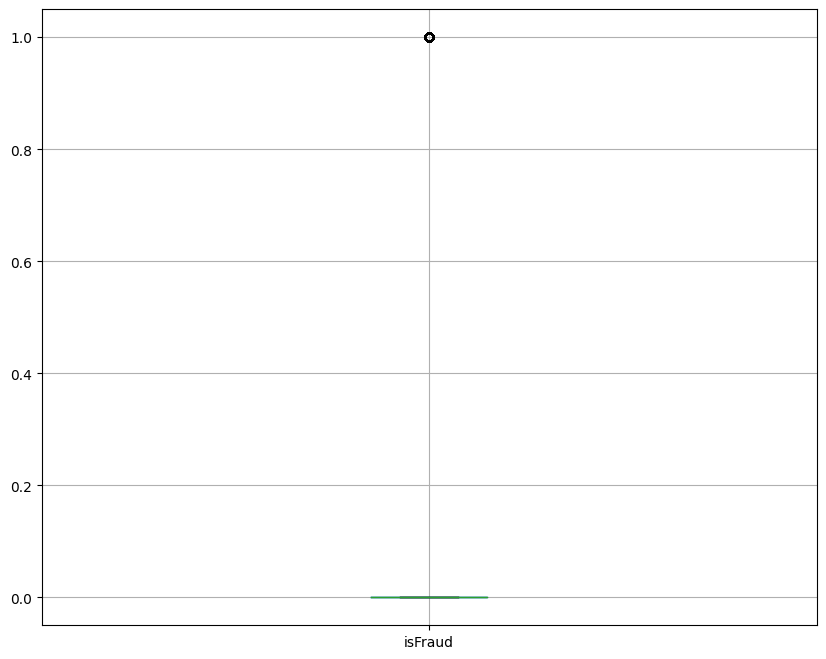

isFlaggedFraud


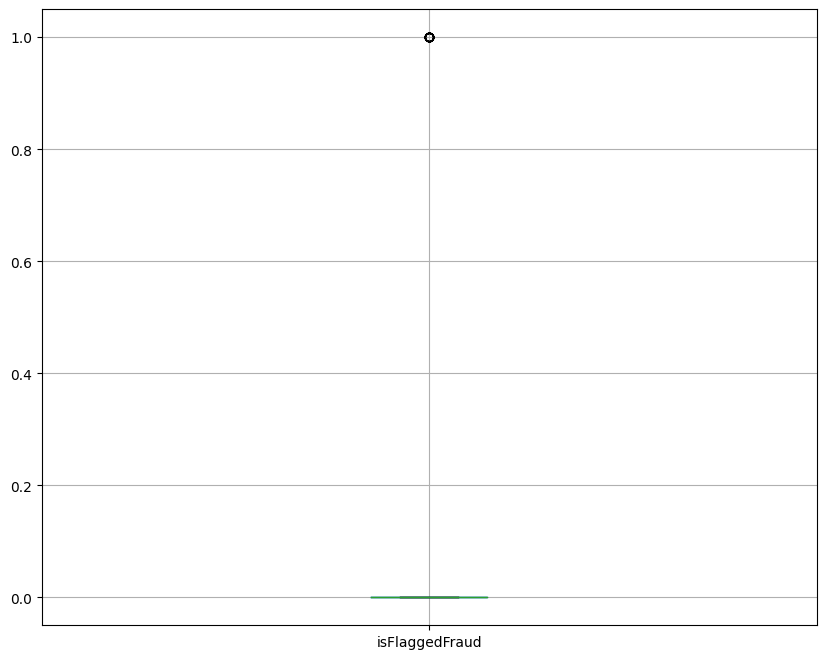

In [ ]:
#checking for outliers using box plot
for col in df.columns:
    if df[col].dtype == 'float64' or df[col].dtype == 'int64':
        print(col)
        df.boxplot(column = col)
        plt.show()
    else:
        pass

In [ ]:
#checking for outliers
numerical_columns = ['step','amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Initialize a dictionary to store the number of outliers for each column
outliers_count = {}

for col in numerical_columns:
    # Calculate the IQR for each numerical column
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

     # Identify potential outliers using the IQR method
    outliers = ((df[col] < (Q1 - 1.5 * IQR)) |
                (df[col] > (Q3 + 1.5 * IQR)))

    # Count the number of outliers for the current column
    num_outliers = outliers.sum()

    # Store the count in the dictionary
    outliers_count[col] = num_outliers

# Display the number of outliers for each column
for col, count in outliers_count.items():
    print(f"Number of outliers in column '{col}': {count}")

Number of outliers in column 'step': 102688
Number of outliers in column 'amount': 338078
Number of outliers in column 'oldbalanceOrg': 1112507
Number of outliers in column 'newbalanceOrig': 1053391
Number of outliers in column 'oldbalanceDest': 786135
Number of outliers in column 'newbalanceDest': 738527


### Visualizing Fraud versus No Fraud Events
### From the below countplot we can see 6354407 occurences of No Fraud events and 8213 number of fraud events

In [ ]:
sns.countplot(df["isFraud"])
df.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

### Visualizing isFlaggedFraud Events


In [ ]:
sns.countplot(df["isFlaggedFraud"])
df.isFlaggedFraud.value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

## <b/> Exploratory Data Analysis

### Analysing Fraud variables occurences
### The transaction is fraud when Fraud value = 1
### The transaction is legit i.e. fraud when Fraud value = 0

In [ ]:
# Number of fraud and legitimate transactions
fraud = len(df[df['isFraud'] == 1])
legit = len(df[df['isFraud'] == 0])
legit_percent = (legit / (fraud + legit)) * 100
fraud_percent = (fraud / (fraud + legit)) * 100

print("Number of Fraud transactions: ", fraud)
print("Number of Legit transactions: ", legit)
print("Percentage of Legit transactions: {:.4f} %".format(legit_percent))
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_percent))

Number of Fraud transactions:  8213
Number of Legit transactions:  6354407
Percentage of Legit transactions: 99.8709 %
Percentage of Fraud transactions: 0.1291 %


- These results prove that this is a highly unbalanced data as Number of Fraud transactions is 8213 and Number of Legit transactions= 6354407. So Random Forest, Decision Trees, XGBoost are good methods for the highly unbalanced data.

In [ ]:
# Visualzing the Merchants Data
X = df[df['nameDest'].str.contains('M')]
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


- There is no information for oldbalanceDest and newbalanceDest for the Merchants.

In [ ]:
# checking correlation
corr = df.corr(numeric_only=True)
corr

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


In [ ]:
# plotting correlation using heatmap
sns.heatmap(data=corr, annot=True)

<Axes: >

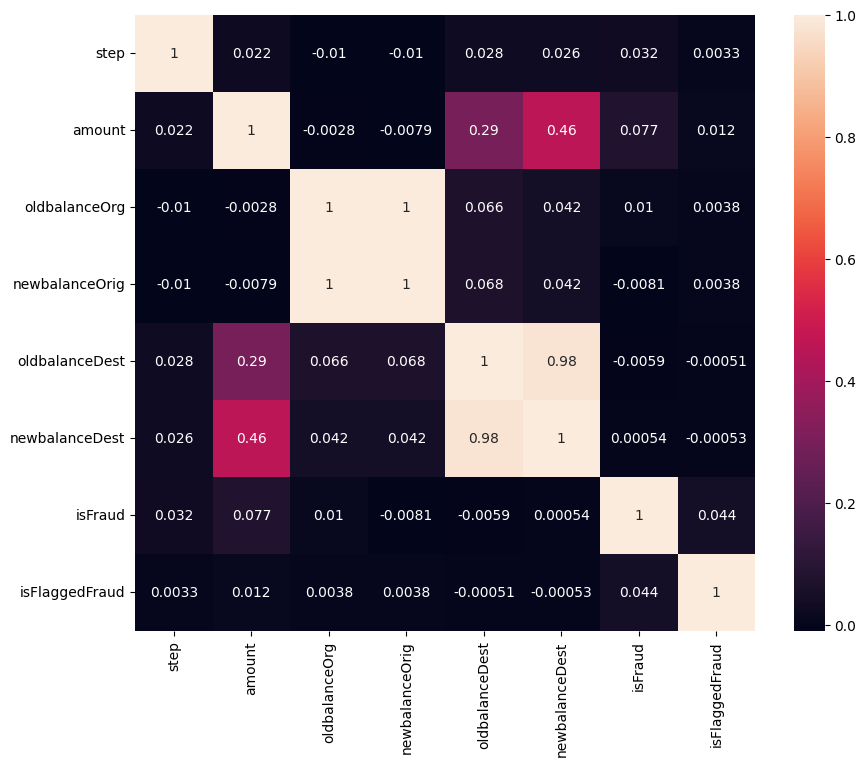

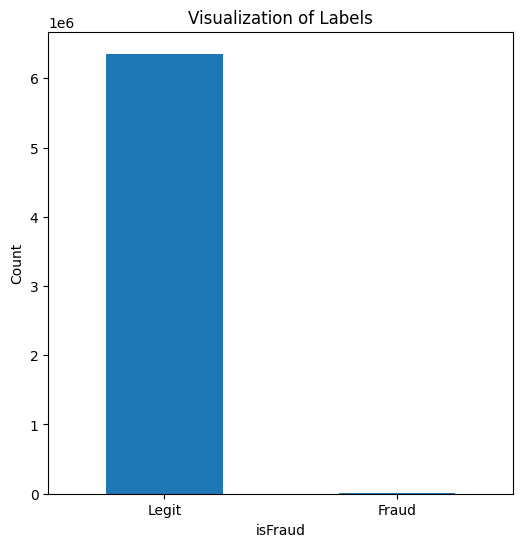

In [ ]:
# plotting bar chart for legit & fraud transaction
plt.figure(figsize=(6,6))
labels = ["Legit", "Fraud"]
count_classes = df.value_counts(df['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

# <b/> Feature Engineering

In [ ]:
# create a copy of the original dataframe
df_new = df.copy()
df_new.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## <b/> Label Encoding

Attributes having dtype : Object

In [ ]:
# check object datatypes
objList = df_new.select_dtypes(include = "object").columns
print(objList)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


- There are 3 attributes with object datatype. We need to label encode these to check multicollinearity.

In [ ]:
# encode the objects
le = LabelEncoder()

for f in objList:
    df_new[f] = le.fit_transform(df_new[f].astype(str))

print(df_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB
None


In [ ]:
df_new.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


## <b/> Multicollinearity

In [ ]:
# function to find the variation inflation factor
def cal_vif(df):
    vif = pd.DataFrame()
    vif['variables'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return vif

cal_vif(df_new)

,variables,VIF
0,step,2.791610
1,type,4.467405
2,amount,4.149312
3,nameOrig,2.764234
4,oldbalanceOrg,576.803777
5,newbalanceOrig,582.709128
6,nameDest,3.300975
7,oldbalanceDest,73.349937
8,newbalanceDest,85.005614
9,isFraud,1.195305


So from the above observation, we can clearly see that there is high corelation between
1) oldbalanceOrg and newbalanceOrig (Scores are mostly similar =  576 and 582)
2) oldbalanceDest and newbalanceDest ( Scores = 73 and 85)

Solution - we can combine these pairs of collinear attributes and drop the individual ones to reduce the complexity of the model.

In [ ]:
# creating new features to capture the change in balances and transaction paths
df_new['Actual_amount_orig'] = df_new.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
df_new['Actual_amount_dest'] = df_new.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
df_new['TransactionPath'] = df_new.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

#Dropping columns
df_new = df_new.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)

cal_vif(df_new)

,variables,VIF
0,type,2.687803
1,amount,3.818902
2,isFraud,1.184479
3,isFlaggedFraud,1.002546
4,Actual_amount_orig,1.307910
5,Actual_amount_dest,3.754335
6,TransactionPath,2.677167


In [ ]:
# new correlation heatmap
corr=df_new.corr()

sns.heatmap(corr,annot=True)

<Axes: >

<b/> How did you select variables to be included in the model?
   
- Using the VIF values and correlation heatmap. We just need to check if there are any two attributes highly correlated to each other and then drop the one which is less correlated to the isFraud Attribute.

# <b/> ML Model Building

## <b/> Scaling the Data

In [ ]:
# scale the dataset
scaler = StandardScaler()
df_new["NormalizedAmount"] = scaler.fit_transform(df_new["amount"].values.reshape(-1, 1))
df_new.drop(["amount"], inplace= True, axis= 1)

Y = df_new["isFraud"]
X = df_new.drop(["isFraud"], axis= 1)

- I did not normalize the complete dataset because it may lead to decrease in accuracy of model.



## <b/> Splitting the Data into training set containing 70% of the data while rest remaining data as test data

In [ ]:
# split the dataset for training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (4453834, 6)
Shape of X_test:  (1908786, 6)


## <b/> Model Training

### 1) Decision Tree

In [ ]:
# Decision Tree
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

Y_pred_dt = dtc.predict(X_test)
dtc_score = dtc.score(X_test, Y_test) * 100
print(dtc_score)

99.92393070779019


### 2) Random Forest Classifier

In [ ]:
# Random Forest
rfc = RandomForestClassifier(n_estimators= 100)
rfc.fit(X_train, Y_train)

Y_pred_rf = rfc.predict(X_test)
rfc_score = rfc.score(X_test, Y_test) * 100

99.95876960539316


### 3) XG Boost Classifier

In [ ]:
# XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)
from sklearn.metrics import accuracy_score

Y_pred_xgb = xgb.predict(X_test)
xgb_score = xgb.score(X_test, Y_test) * 100



99.95766942967938


### 4) Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB
bnb_model=BernoulliNB()
bnb_model.fit(X_train,Y_train)

BernoulliNB()

In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
y_pred=bnb_model.predict(X_test)

In [ ]:
nb_score = rfc.score(X_test, Y_test) * 100
print(accuracy_score(Y_test.values,y_pred)*100)


99.92162557772323


### 5) Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svm_model=SVC()
svm_model.fit(X_train,Y_train)

SVC()

In [ ]:
y_pred=svm_model.predict(X_test)

In [ ]:

print(accuracy_score(Y_test.values,y_pred)*100)

99.91167160697951


### 6) Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
y_pred=log_model.predict(X_test)

In [ ]:
print(accuracy_score(Y_test.values,y_pred)*100)

99.8032781045125


- Random Forest performs the best among all in terms of ACCURACY SCORES compared to the other algorithms used

### Contribution of important Features in our case

In [ ]:
feature_importances = dtc.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance DataFrame
print(feature_importance_df)

              Feature  Importance
2  Actual_amount_orig    0.425381
3  Actual_amount_dest    0.311190
4     TransactionPath    0.120214
0                type    0.078074
5    NormalizedAmount    0.063583
1      isFlaggedFraud    0.001559


As Random Forest and XGBoost algorithms are the one having accuracy scores nearby each other (almost similar), we will calculate confusion matrix of these 3 algorithms

In [ ]:
# key terms of Confusion Matrix - DT

print("TP,FP,TN,FN - Decision Tree")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_dt).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

print("----------------------------------------------------------------------------------------")

# key terms of Confusion Matrix - RF

print("TP,FP,TN,FN - Random Forest")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_rf).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

print("----------------------------------------------------------------------------------------")

# key terms of Confusion Matrix - XGB

print("TP,FP,TN,FN - XGBoost")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_xgb).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

TP,FP,TN,FN - Decision Tree
True Positives: 1716
False Positives: 750
True Negatives: 1905601
False Negatives: 719
----------------------------------------------------------------------------------------
TP,FP,TN,FN - Random Forest
True Positives: 1713
False Positives: 61
True Negatives: 1906290
False Negatives: 722
----------------------------------------------------------------------------------------
TP,FP,TN,FN - XGBoost
True Positives: 1670
False Positives: 43
True Negatives: 1906308
False Negatives: 765


- TP(Decision Tree) ~ TP(Random Forest) ~ TP(XGBoost) so no competetion here.
- FP(Decision Tree) >> FP(Random Forest) >> FP(XGBoost) - XGBoost has an edge here.
- TN(Decision Tree) < TN(Random Forest) < TN(XGBoost) - Random Forest is better here too
- FN(Decision Tree) ~ FN(Random Forest) ~ FN(XGBoost)

- XGBoost Classifier works more good in this scenario.

In [ ]:
# confusion matrix - DT

confusion_matrix_dt = confusion_matrix(Y_test, Y_pred_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt,)

print("----------------------------------------------------------------------------------------")

# confusion matrix - RF

confusion_matrix_rf = confusion_matrix(Y_test, Y_pred_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

print("----------------------------------------------------------------------------------------")

# confusion matrix - XGB

confusion_matrix_xgb = confusion_matrix(Y_test, Y_pred_xgb.round())
print('Confusion Matrix - XGBoost')
print(confusion_matrix_xgb)

Confusion Matrix - Decision Tree
[[1905601     750]
 [    719    1716]]
----------------------------------------------------------------------------------------
Confusion Matrix - Random Forest
[[1906290      61]
 [    722    1713]]
----------------------------------------------------------------------------------------
Confusion Matrix - XGBoost
[[1906308      43]
 [    765    1670]]


In [ ]:
# classification report - DT

classification_report_dt = classification_report(Y_test, Y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)

print("----------------------------------------------------------------------------------------")

# classification report - RF

classification_report_rf = classification_report(Y_test, Y_pred_rf)
print("Classification Report - Random Forest")
print(classification_report_rf)

print("----------------------------------------------------------------------------------------")

# classification report - XGB

classification_report_xgb = classification_report(Y_test, Y_pred_xgb)
print("Classification Report - XGBoost")
print(classification_report_xgb)

Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.70      0.70      0.70      2435

    accuracy                           1.00   1908786
   macro avg       0.85      0.85      0.85   1908786
weighted avg       1.00      1.00      1.00   1908786

----------------------------------------------------------------------------------------
Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.97      0.70      0.81      2435

    accuracy                           1.00   1908786
   macro avg       0.98      0.85      0.91   1908786
weighted avg       1.00      1.00      1.00   1908786

----------------------------------------------------------------------------------------
Classification Report - XGBoost
              precision    recall  f1-score   support

     

- With Such a good precision and hence F1-Score, XGBoost comes out to be better as expected.

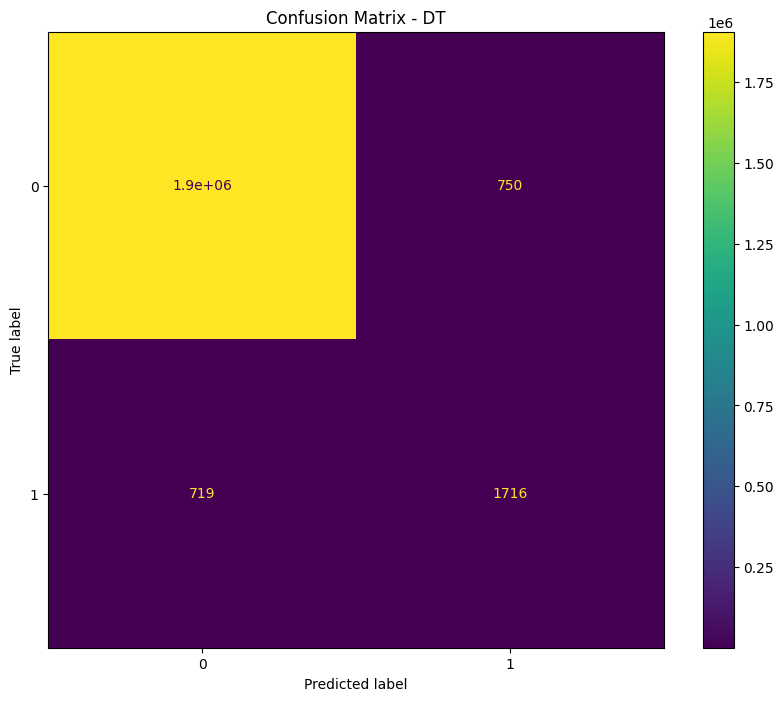

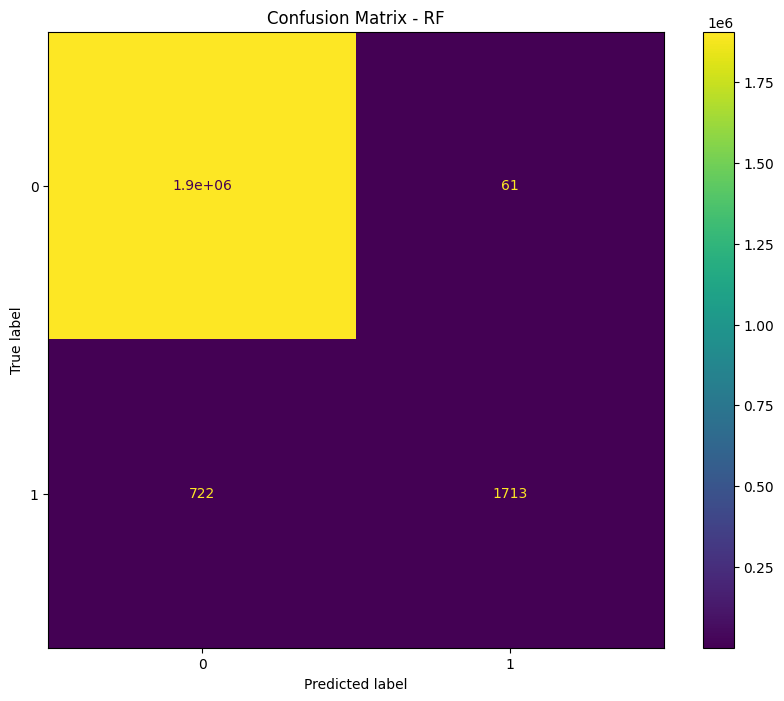

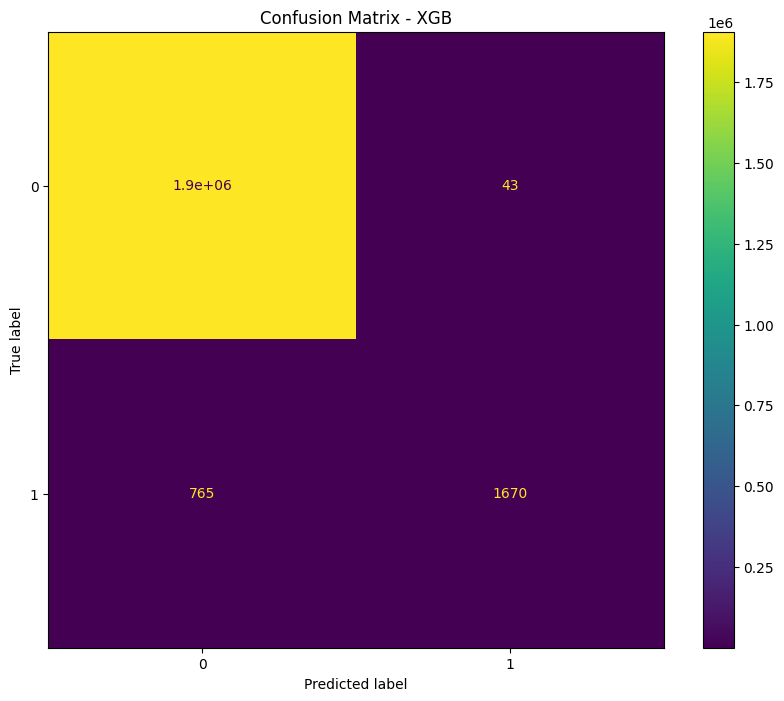

In [ ]:
# visualising confusion matrix - DT

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt)
disp.plot()
plt.title('Confusion Matrix - DT')
plt.show()

# visualising confusion matrix - RF
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf)
disp.plot()
plt.title('Confusion Matrix - RF')
plt.show()

# visualising confusion matrix - XGB
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_xgb)
disp.plot()
plt.title('Confusion Matrix - XGB')
plt.show()

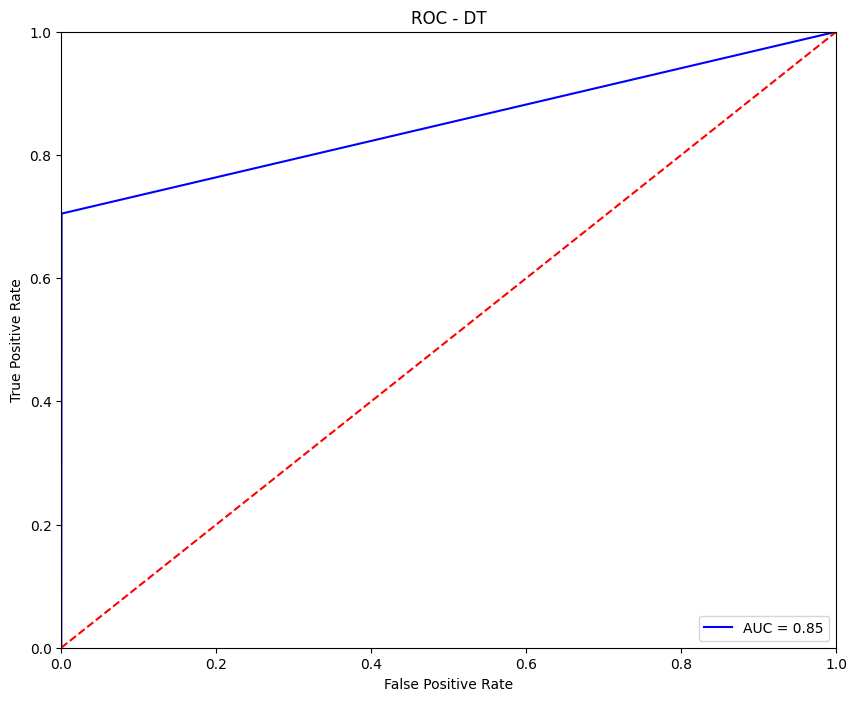

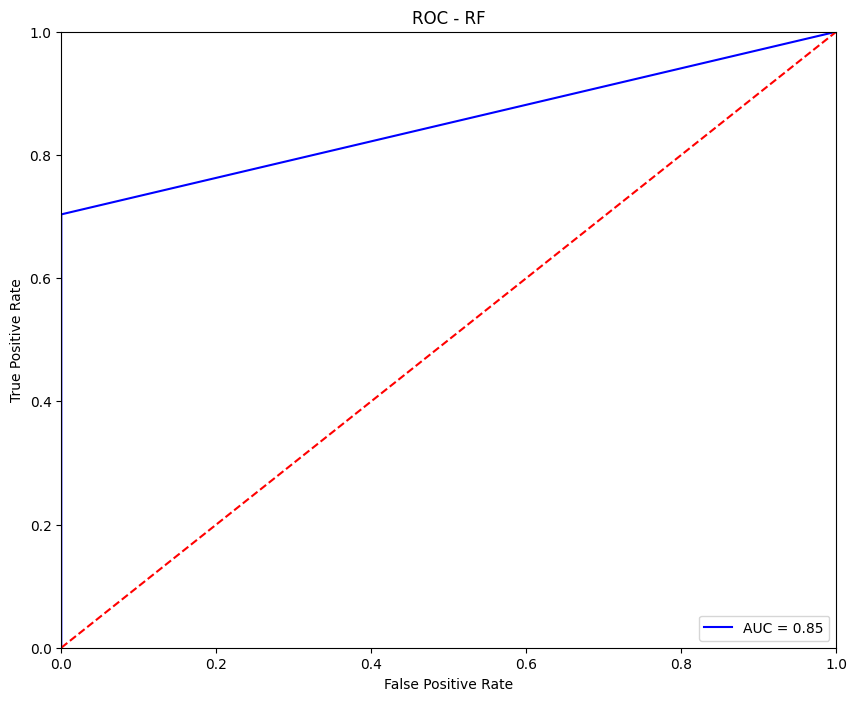

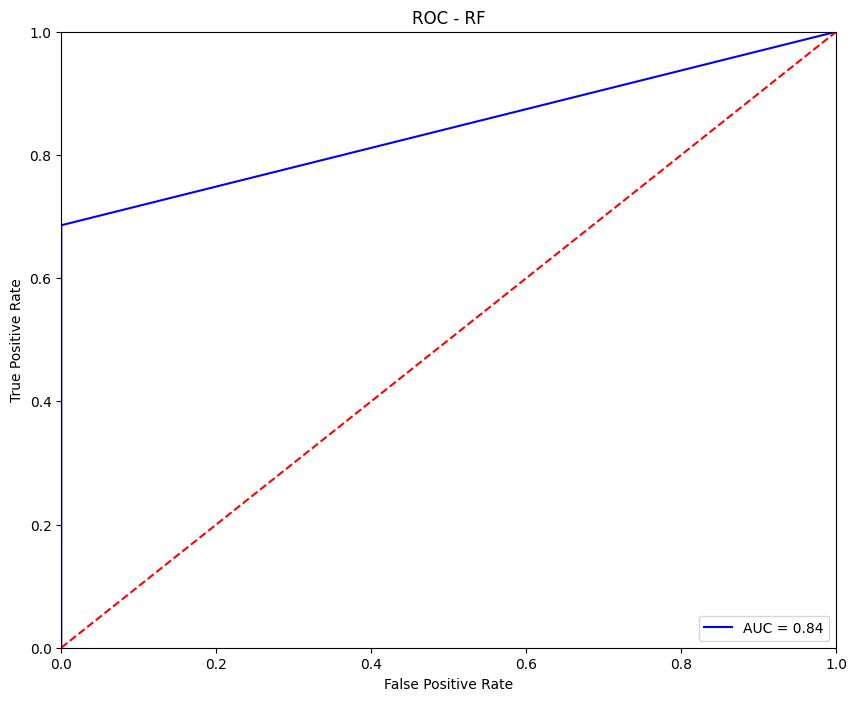

In [ ]:
# AUC ROC - DT
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_dt)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC ROC - RF
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_rf)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC ROC - XGB
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_xgb)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

- The AUC ROC for Decision Tree, Random Forest and XGBoost is equal, so all these three models are pretty good.

## <b/> Key points and Conclusion of our code:

- Task overview :
The Dataset was highly imbalanced with Legit: 6354407 and Fraud :8213
We can balance the dataset using SMOTE Technique but this would affect the performance as we additionally increase Fraud occurences and decrease the Legit occurences to balance them. Doing this, the dataset becomes changed and loses the Originality.



###### - Importing Libraries
###### - Loading the Dataset
###### - Data Preprocessing
###### - Check for Outliers
###### - Visualizing Fraud versus No Fraud Events
###### - Visualizing isFlaggedFraud Events
###### - EDA – Exploratory Data Analysis
###### - Visualizations
###### - Feature Engineering
###### - Label Encoding
###### - Checking Multi collinearity between variables and calculating variation inflation factor (VIF)
###### - Scaling the data (Normalization)
###### - Splitting the data
###### - Model Training
###### - <b><font color='purple'>   I have used various algorithms to check for the best results. The algorithms used were: </font> </b>
###### 1)	Decision Tree
###### 2)	Random Forest Classifier
###### 3)	XG Boost Classifier
###### 4)	Naïve Bayes
###### 5)	Support Vector Machine
###### 6)	Logistic Regression

I tried stacking but it took a huge amount of time to get trained as the dataset and number of parameters were high which seemed impossible to execute stacking.


We have observed that while XGBoost has greater precision,
Random Forest, Decision Tree, and XGBoost all have equal accuracy. Precision is crucial in a fraud detection model since we want to know about fraudulent transactions so that they can be accurately predicted and legitimate transactions can be excluded, as opposed to correctly predicting regular transactions.

This is also one of the reasons ensemble approaches are employed rather than alternative methods.


By iteratively merging the predictions of several different models, frequently decision trees, XGBoost creates a predictive model.





<b><font color='purple'>   1. Data cleaning including missing values, outliers and multi-collinearity. </b> </font>



- I started the data cleaning procedure by carefully looking for any missing values. If I find any, I remove the rows that have the necessary data missing.
But the dataset didn't have any missing values.
- After that, checked for outliers from various features such as : 'step','amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'.

- Furthermore, I evaluated the correlation across various columns, resulting in the elimination of highly correlated variables and merging them into one. To reduce the dimensionality and complexity of our model. The dataset will be more suited for subsequent procedures as a result.
- There was high corelation between
1) oldbalanceOrg and newbalanceOrig (Scores are mostly similar =  576 and 582)
2) oldbalanceDest and newbalanceDest ( Scores = 73 and 85)  

- So we can combine these pairs of collinear attributes and drop the individual ones to reduce the complexity of the model.

<b><font color='purple'>   2. Describe your fraud detection model in elaboration. </b> </font>



I have used various algorithms to check for the best results. The algorithms used were:
###### 1)	Decision Tree
###### 2)	Random Forest Classifier
###### 3)	XG Boost Classifier
###### 4)	Naïve Bayes
###### 5)	Support Vector Machine
###### 6)	Logistic Regression

Among all six algorithms, Random Forest Classifier performed best in terms of accuracy, while XG Boost Classifier performed best in terms of precision

<b><font color='purple'>  3. How did you select variables to be included in the model? </b> </font>

There are various methods to select the set of variables but I chose Correlations. It helped me select the variables. Additionally, I have chosen a few key factors on my own, such as type, amount, etc.


<b><font color='purple'>   4 . Demonstrate the performance of the model by using best set of tools.
 </b> </font>

 To check the performance of our machine learning models, we made use of :
- Confusion matrix
- Accuracy
- Precision
- Recall
- F1 score
- ROC (Receiver Operating Characteristics) curve

Best Accuracy Scores
-- Random Forest had the highest accuracy among tested models.

- Random Forest Score:  99.95897916267198
- XGBoost Score      :  99.95766942967938


<b><font color='purple'> 5.  What are the key factors that predict fraudulent customer? </b> </font>

The key factors in predicting fraudelent transactions are balanceChangeOrig, balanceChangeDest, step, type_TRANSFER, nameOrig, nameDest, amount, type_CASH_OUT, isFlaggedFraud, and type_PAYMENT.

According to me, the key factors that predict fraudulent customer from the DATASET are :

- Actual_amount_orig , Actual_amount_dest,TransactionPath, type, NormalizedAmount, isFlaggedFraud



Otherwise for some different general scenario, Listed below are important ones :

- Transaction type.
- Whether the source of payment request is secured or not?
- Is the receiver organization is legitimate or not?
- Transaction amount.
- Changes in balances.


<b><font color='purple'> 6.  Do These Factors Make Sense? If Yes, How? If Not, How Not? </b> </font>

These factors make sense in the context of fraud detection for several reasons:  

  Transaction path: The transaction path refers to the sequence and nature of transactions and interactions that a customer performs, which can reveal patterns indicative of fraud.
  
  Amount: Unusually high transaction amounts can suggest fraud. 'isFlaggedFraud' flag indicates that the transaction was flagged as potentially fraudulent. 'type_PAYMENT' feature's lower importance suggests that regular payment transactions have less predictive power for fraud detection.

Yes, these factors make sense:
- Transaction Amount: Transactions with amounts that deviate significantly from the customer's typical spending pattern.

- Transaction Type: Certain transaction types might be more prone to fraud (e.g., high value transactions, recurring transactions , international transfers).

- Change in Balance : Significant or unusual changes in a customer's account balance can be indicative of fraudulent behavior.

<b><font color='purple'> 7 . What Kind of Prevention Should Be Adopted While Company Update Its Infrastructure? </b> </font>

- Network Security
- Strong Authentication and Authorization - Mechanisms
- Data Encryption
- Secure Configuration Management
- Least Privilege Principle and Multi-Factor Authentication (MFA)
- Regular Audits and Compliance Checks


<b><font color='purple'>8.  Assuming These Actions Have Been Implemented, How Would You Determine If They Work? </b> </font>


Here are some steps to ensure the measures are working:


- Regular Audits and Assessments : Conduct periodic internal and external audits for the assessments and idetification of vulnerabilities
- Performance Metrics: Monitor the accuracy of fraud detection systems by tracking false positives (legitimate transactions flagged as fraud) and false negatives (fraudulent transactions not flagged).
- Track Fraud Rates: Keep tabs on the rates of fraud both prior to and during implementation.
- User Input: Learn what the public thinks about the new security protocols.


--------